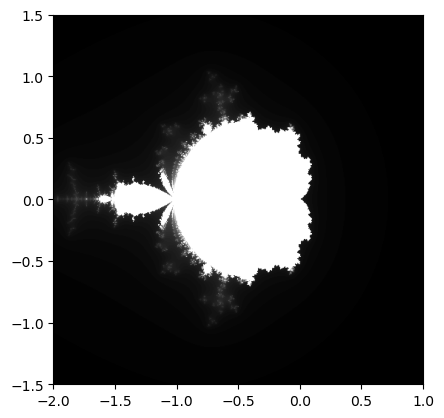

In [38]:
####################################################
#         mandelbrot.py                            #
####################################################
import numpy as np
import matplotlib.pyplot as plt

# Method to check if a given complex number converges or diverges based on Mandelbrot relation
# -1 if converges, iteration count at divergence if diverges
def check_convergence(complex_val):
    NMAX = 100
    THRESHOLD = 50
    z = complex_val
    for i in range(NMAX):
        if abs(z) > THRESHOLD:
            return i
        z = z**2 + z + complex_val 
    return -1
        


# create grid
GRIDSIZE=500
x, y = np.mgrid[-2:1:500j, -1.5:1.5:500j]
c_grid = x + 1j*y

# initialize mandelbrot mask grid as zeros
mandelbrot_mask = np.zeros(shape=(GRIDSIZE,GRIDSIZE))

# for every complex number in the grid, use custom function to determine convergence
# and store associated value in mandelbrot_mask
for i in range(c_grid.shape[0]):
    for j in range(c_grid.shape[1]):
        mandelbrot_mask[i][j] = check_convergence(c_grid[i][j])

# If the mask has -1 at any index to indicate convergence, change value to 100 for pure white
mandelbrot_mask = np.where(mandelbrot_mask > 0, mandelbrot_mask, 100)

# Generate image of the fractal using the mandelbrot_mask and save
plt.imshow(mandelbrot_mask.T, extent=[-2,1,-1.5,1.5])
plt.gray()
plt.savefig('mandelbrot.png')
plt.show()

In [933]:
###########################################
#             markov_chain.py             #
###########################################

import numpy as np
from numpy import random

N_ITER = 50

# Generate non-normalized Markov P matrix and normalize every row
P = random.rand(5, 5)

for row in range(P.shape[0]):
    P[row] /= sum(P[row])

# Generate transpose of normalized matrix
Pt = np.transpose(P)

# Generate initial p-vector and normalize
p50 = random.rand(5)
p50 /= sum(p50)

# Iteratively apply transition rule 
for i in range(N_ITER):
    p50 = np.matmul(Pt, p50)
    p50 /= sum(p50)
    
# print(p50)

# Generate eigenvalues and eigenvectors of transpose of P matrix
evals, evecs = np.linalg.eig(Pt)

# print(f"evals: {evals}")

# Extract eigenvector corresponding to eigenvalue of 1
evec = evecs[:,0]
evec /= sum(evec)

diff_vec = evec - p50
print(f"Stationary distribution according to iterative refinement: {p50}")
print(f"Stationary distribution according to matrix transpose: {evec}")
print(f"Difference between vectors: {sum(diff_vec)}")

Stationary distribution according to iterative refinement: [0.19097775 0.20768374 0.14767547 0.15594801 0.29771503]
Stationary distribution according to matrix transpose: [0.19097775+0.j 0.20768374+0.j 0.14767547+0.j 0.15594801+0.j
 0.29771503+0.j]
Difference between vectors: (-8.326672684688674e-17+0j)


   Degree  Time (s)         Error
0    50.0  2.897348  4.949573e+01
1    60.0  3.701249  1.754306e-03
2    70.0  3.924999  6.191526e-07
3    80.0  4.914601  6.191526e-07
4    90.0  5.144843  6.191526e-07


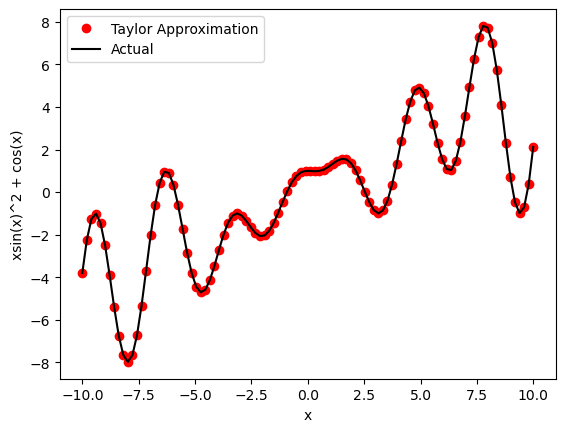

In [927]:
###########################################
#             taylor_series.py            #
###########################################
import sympy as sp
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from math import factorial as fact

START, END, POINTS, C = -10.0, 10.0, 100, 0
INIT_DEG, TERM_DEG, STEP_DEG = 50, 100, 5

# Calculation of Taylor function at given $fixed_c in range [$start, $end]
# Will:
#   - Calculate an approximation of any given function in Taylor form
#     to $degree polynomial degrees and store in $f_x
#   - Use this generated function to calculate 100 points along the interval
#     given by [$start, $end]
# Returns:
#   - Pandas Series of 100 points provided by the Taylor approximation
def taylor_at_point(func, start, end, degree, fixed_c):
    NPOINTS = 100
    x = sp.symbols("x")
    f_x = 0
    approx_points = pd.Series(np.zeros(NPOINTS))
    # generate Taylor polynomial and store symbolic in f_x
    for n in range(degree):
        tmp_func = sp.diff(func, x, n)
        f_x += (tmp_func.subs(x, fixed_c)/fact(n)).evalf() * (x - fixed_c)**n
    count = 0
    steps = np.linspace(start, end, NPOINTS)
    # generate 100 points using the Taylor approximation
    for x_val in steps:
        approx_points[count] = float(f_x.subs(x, x_val))
        count += 1
    return approx_points

# Benchmarking of Taylor approximation efficiency
# Will:
#   - Calculate a Taylor approximation for every m provided in the linear space
#     [$initial_deg, $final_deg, $deg_step]
#   - Record the times and summed error of the returned approximation points
# Returns:
#   - Pandas Dataframe containing columns for the degree, time for calculation, and 
#     error of each Taylor approximation
def taylor_in_range(func, start, end, degree, fixed_c, initial_deg, final_deg, deg_step):
    # initialize empty arrays and count
    degree_linspace = range(initial_deg, final_deg, deg_step)
    degrees = pd.Series(np.zeros(len(degree_linspace)))
    times = pd.Series(np.zeros(len(degree_linspace)))
    errors = pd.Series(np.zeros(len(degree_linspace)))
    count = 0
    # for every degree provided along the step, get a Taylopr approximation and
    # record the time it took as well as the error of the final points
    for degree in degree_linspace:
        tic = time.time()
        exp_points = taylor_at_point(func, start, end, degree, fixed_c)
        ref_points = pd.Series(np.zeros(len(degree_linspace)))
        x_vals = np.linspace(START, END, POINTS)
        for i in range(ref_y.size):
            ref_points[i] = float(func.subs(x, x_vals[i]))
        toc = time.time()
        # print(exp_points) # debug
        tmp_error = sum(abs(exp_points - ref_points))
        tmp_time = toc - tic
        degrees[count] = degree
        times[count] = tmp_time
        errors[count] = tmp_error
        count += 1
    # create the return array and return it
    return_array = pd.concat([degrees, times, errors], axis=1)
    return_array.columns = ["Degree", "Time (s)", "Error"]
    return return_array

######### PART 1 ##########

x_vals = np.linspace(START, END, POINTS)

x = sp.symbols("x")
sample_f = x * (sp.sin(x))**2 + sp.cos(x)
taylor_y = taylor_at_point(sample_f, START, END, POINTS, C)
# taylor_y = ref_y = pd.Series(np.zeros(POINTS)) # debug
ref_y = pd.Series(np.zeros(POINTS))
for i in range(ref_y.size):
    ref_y[i] = float(sample_f.subs(x, x_vals[i]))

# plot approx points
plt.plot(x_vals, taylor_y, 'ro', label="Taylor Approximation")
plt.plot(x_vals, ref_y, 'k-', label="Actual")
plt.xlabel("x")
plt.ylabel("xsin(x)^2 + cos(x)")
plt.legend(loc='best')
plt.savefig("Taylor_Approx.png")

########## PART 2 ##########

benchmark = taylor_in_range(sample_f, START, END, POINTS, C, INIT_DEG, TERM_DEG, STEP_DEG)
# print(benchmark) # debug
benchmark.to_csv("taylor_approx_benchmark.csv", index=False)

In [891]:
a = pd.Series([0, 1])
b = pd.Series([1, 0])
c = abs(a - b)
print(c)

0    1
1    1
dtype: int64
